In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Iris\Iris_NN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,NaN
2,NaN,3.2,1.3,NaN
3,NaN,3.1,1.5,0.2
4,NaN,3.6,1.4,0.2
...,...,...,...,...
145,NaN,3.0,NaN,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	43
float64		column 2	0
float64		column 3	28
float64		column 4	43


In [4]:
df.describe()

,column 1,column 2,column 3,column 4
count,107.000000,150.000000,122.000000,107.000000
mean,5.871963,3.054000,3.769672,1.235514
std,0.776275,0.433594,1.701962,0.692855
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.000000,1.800000
max,7.900000,4.400000,6.700000,2.500000


<AxesSubplot:>

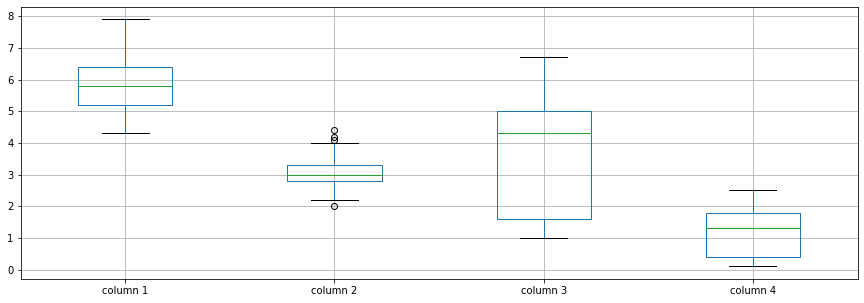

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    5.871963
column 2    3.054000
column 3    3.769672
column 4    1.235514
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4
column 1,1.000000,-0.054442,0.838148,0.720423
column 2,-0.054442,1.000000,-0.402010,-0.404271
column 3,0.838148,-0.402010,1.000000,0.945167
column 4,0.720423,-0.404271,0.945167,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [4,4+42,4+42+42,4+42+42+42,4+42+42+42+42,4+42+42+42+42+42,4+42+42+42+42,4+42+42+42,4+42+42,4+42,4], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [4]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 11.648735894097221
Epoch: 1 , loss: 11.531287299262154
Epoch: 2 , loss: 11.701498773362902
Epoch: 3 , loss: 11.628022193908691
Epoch: 4 , loss: 11.56439134809706
Epoch: 5 , loss: 11.644930627610949
Epoch: 6 , loss: 11.512625482347277
Epoch: 7 , loss: 11.703970379299587
Epoch: 8 , loss: 11.693023045857748
Epoch: 9 , loss: 11.551820437113443
Epoch: 10 , loss: 11.713811556498209
Epoch: 11 , loss: 11.587129910786947
Epoch: 12 , loss: 11.537850273980034
Epoch: 13 , loss: 11.542882495456272
Epoch: 14 , loss: 11.621845033433702
Epoch: 15 , loss: 11.607343355814615
Epoch: 16 , loss: 11.543186293707954
Epoch: 17 , loss: 11.586110962761772
Epoch: 18 , loss: 11.572308540344238
Epoch: 19 , loss: 11.696487850613064
Epoch: 20 , loss: 11.523950894673666
Epoch: 21 , loss: 11.639083332485622
Epoch: 22 , loss: 11.503973854912651
Epoch: 23 , loss: 11.597454282972548
Epoch: 24 , loss: 11.652101410759819
Epoch: 25 , loss: 1

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(150, 4)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    5.1
column 2    3.7
column 3    1.5
column 4    0.4
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Iris.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4
0,0.000000,0.0,0.000000,0.000000
1,0.000000,0.0,0.000000,-0.185556
2,-4.685277,0.0,0.000000,-0.185830
3,-4.585694,0.0,0.000000,0.000000
4,-4.985601,0.0,0.000000,0.000000
...,...,...,...,...
145,-6.685231,0.0,-5.185071,0.000000
146,0.000000,0.0,0.000000,0.000000
147,0.000000,0.0,0.000000,0.000000
148,0.000000,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(45.23186446953577, 97.653468960401)

In [17]:
NRMS=numerator/denominator
NRMS


0.4631874827496147

In [18]:
new_df.iloc[66,:]

column 1    5.6
column 2    3.0
column 3    4.5
column 4    1.5
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4
0,5.100000,3.5,1.400000,0.200000
1,4.900000,3.0,1.400000,0.014444
2,0.014723,3.2,1.300000,0.014170
3,0.014306,3.1,1.500000,0.200000
4,0.014399,3.6,1.400000,0.200000
...,...,...,...,...
145,0.014769,3.0,0.014929,2.300000
146,6.300000,2.5,5.000000,1.900000
147,6.500000,3.0,5.200000,2.000000
148,6.200000,3.4,5.400000,2.300000


In [20]:
imputations[-1].to_excel("Iris_NN_20(imp).xlsx", index=False, header=False)